# 第14章 k均值聚类

## 习题1
k均值算法收敛得到的解一定是局部最优吗？一定是全局最优吗？  
&emsp;  A. 是 
&emsp;  B. 不是

**解答**


&emsp;&emsp; **答案 ：A**  

&emsp;&emsp; K均值算法采用迭代的方法不断调整簇中心，直到算法收敛。在收敛以后，算法达到的状态一定是一个局部最优解，即再微调簇中心也无法进一步减少目标函数的值。

&emsp;&emsp; **答案 ：B**  

&emsp;&emsp; 由于该算法对初始簇中心的选择非常敏感，不同的初始化方式可能导致不同的局部最优解，因此其收敛结果不一定是全局最优解。换句话说，K均值算法在大多数情况下只能保证收敛到局部最优，而无法确保全局最优。因此，对于k均值算法，为了减小陷入局部最优的概率，通常会进行多次随机初始化，然后选择损失函数值最小的结果作为最优解。或者使用优化的K-means++；或者使用其他优化算法。


## 习题2

如果设定的`K`值比数据中实际的类别要少，会造成什么情况？是否有办法在不知道数据包含几类的情况下，选出合适的`K`值？

**解答**

&emsp;&emsp;如果设定的K值比数据中实际的类别要少，会造成以下情况：

  - 多个类别会被强行合并到较少的簇中。聚类的效果无法显示簇内数据真实的特点。
  - 簇内方差增大，簇的直径会显著增大，一个簇会容纳更多本应分开的子类，导致聚类质量下降。
  - 初始质心的选择对结果影响更大，算法可能更容易陷入局部最优，难以通过调整初始质心优化簇划分 。
  

&emsp;&emsp;在不知道数据包含几类的情况下，确定合适K值的方法有：

1. **肘部法则(Elbow Method)**：计算不同K值对应的簇内平方和或轮廓系数，并绘制曲线图。在曲线出现明显"拐点"处，对应的K值很有可能是较优选择。  
2. **轮廓系数(Silhouette Coefficient)**：计算每个样本的轮廓系数（衡量簇内紧密度与簇间分离度），轮廓系数接近1表示聚类效果好，选择此时的`K`值。  
3. **间隙统计量(Gap Statistic)**：比较实际数据的聚类效果与随机生成数据的聚类效果之差，来估计`K`值。  
4.  **层次聚类辅助分析**：先进行层次聚类，通过树状图(dendrogram)观察合并过程，观察簇间距离，选择垂直距离较大的分支对应的K值。
5.  **​多次随机初始化**：多次随机初始化，计算多次聚类结果，分析不同K值下结果的稳定性，选择效果最好的K值。

&emsp;&emsp;注：  实际应用中可以根据问题和需求先设定`K`的范围，结合多种方法综合评估，考虑实际场景中对簇的数量的要求，平衡算法的实用性和性能，选择最合理的`K`值。

##  习题3

k均值算法的结果及其依赖于初始中心的选取，从而对随机种子非常敏感。试构造一个数据集，在`K = 3`的情况下，存在至少两组`K`均值算法可能收敛到的聚类中心，且数据的分类不同。如果换成k-means++算法，在该数据集上收敛的结果是否唯一？

**解答**

&emsp;&emsp;换成`k-means++`算法，在不同的随机种子下，收敛的结果也不是唯一的，可能是相近的局部最优。虽然`k-means++`通过优化初始中心选择过程，大幅提高了找到全局最优解的概率，但它仍然是一种概率算法。`k-means++`算法也不能保证收敛结果唯一。相比于`k-means`能得到相似的聚类中心已经是不错的结果了。  

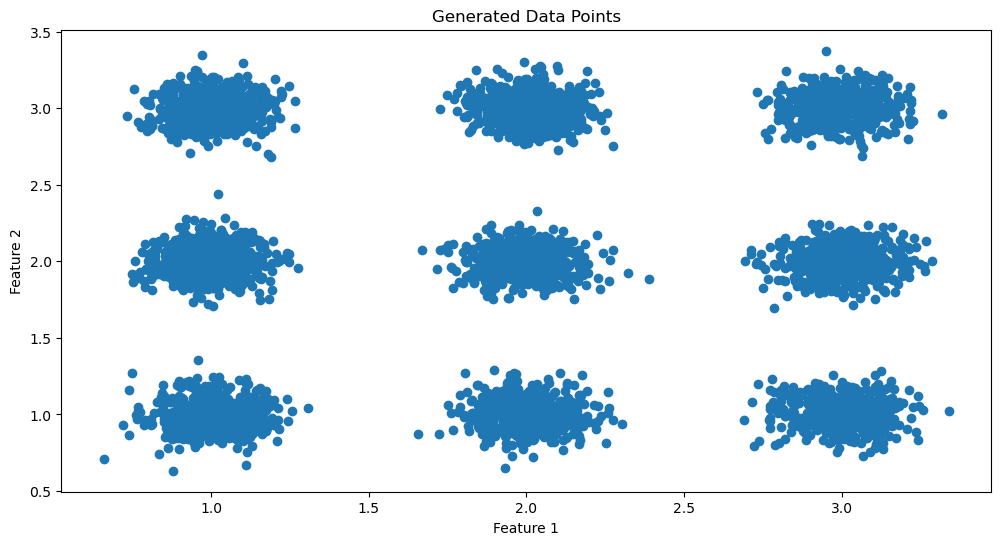

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 设置随机种子以确保结果可重复
np.random.seed(2024)


# 生成数据
n_samples = 4500
cluster_std = 0.1
centers = [[1, 1], [1, 2], [1, 3], [2, 1], [2, 2], [2, 3], [3, 1], [3, 2], [3, 3]]
X, _ = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=np.random.seed(2024))

# 绘制生成的数据点
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.title('Generated Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

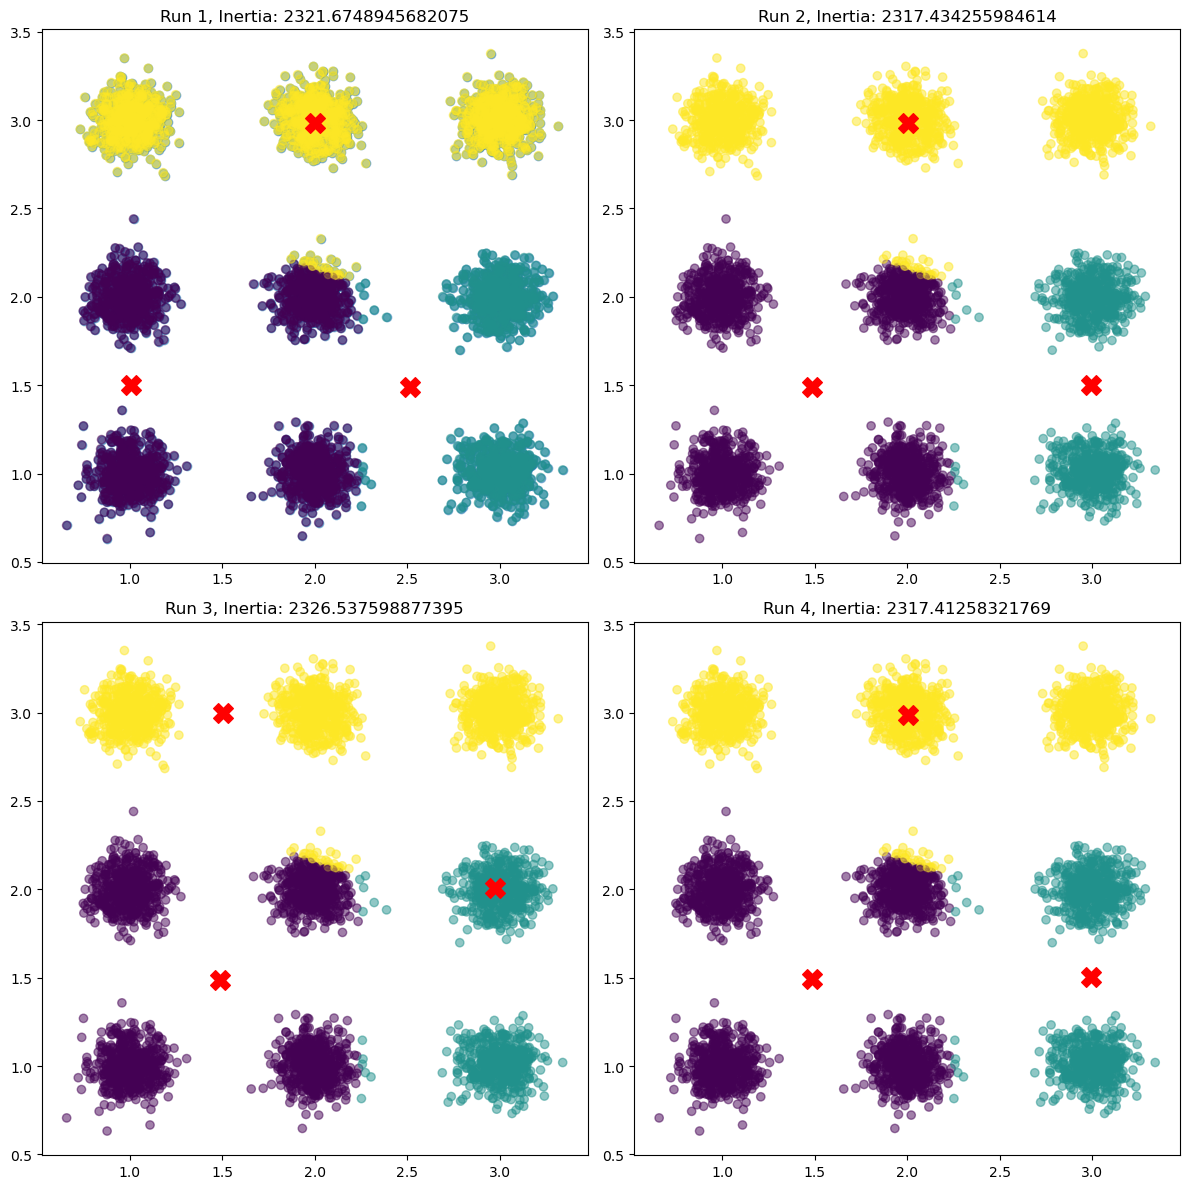

In [3]:
# 应用KMeans算法
n_clusters = 3
inertia_list = []
cluster_centers_list = []

for i in range(4):
    kmeans = KMeans(n_clusters=n_clusters, init='random').fit(X)
    inertia_list.append(kmeans.inertia_)
    cluster_centers_list.append(kmeans.cluster_centers_)

# 绘制聚类结果
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)

for i, centers in enumerate(cluster_centers_list, start=1):
    plt.subplot(2, 2, i)
    plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X')
    plt.title(f'Run {i}, Inertia: {inertia_list[i-1]}')

plt.tight_layout()
plt.show()

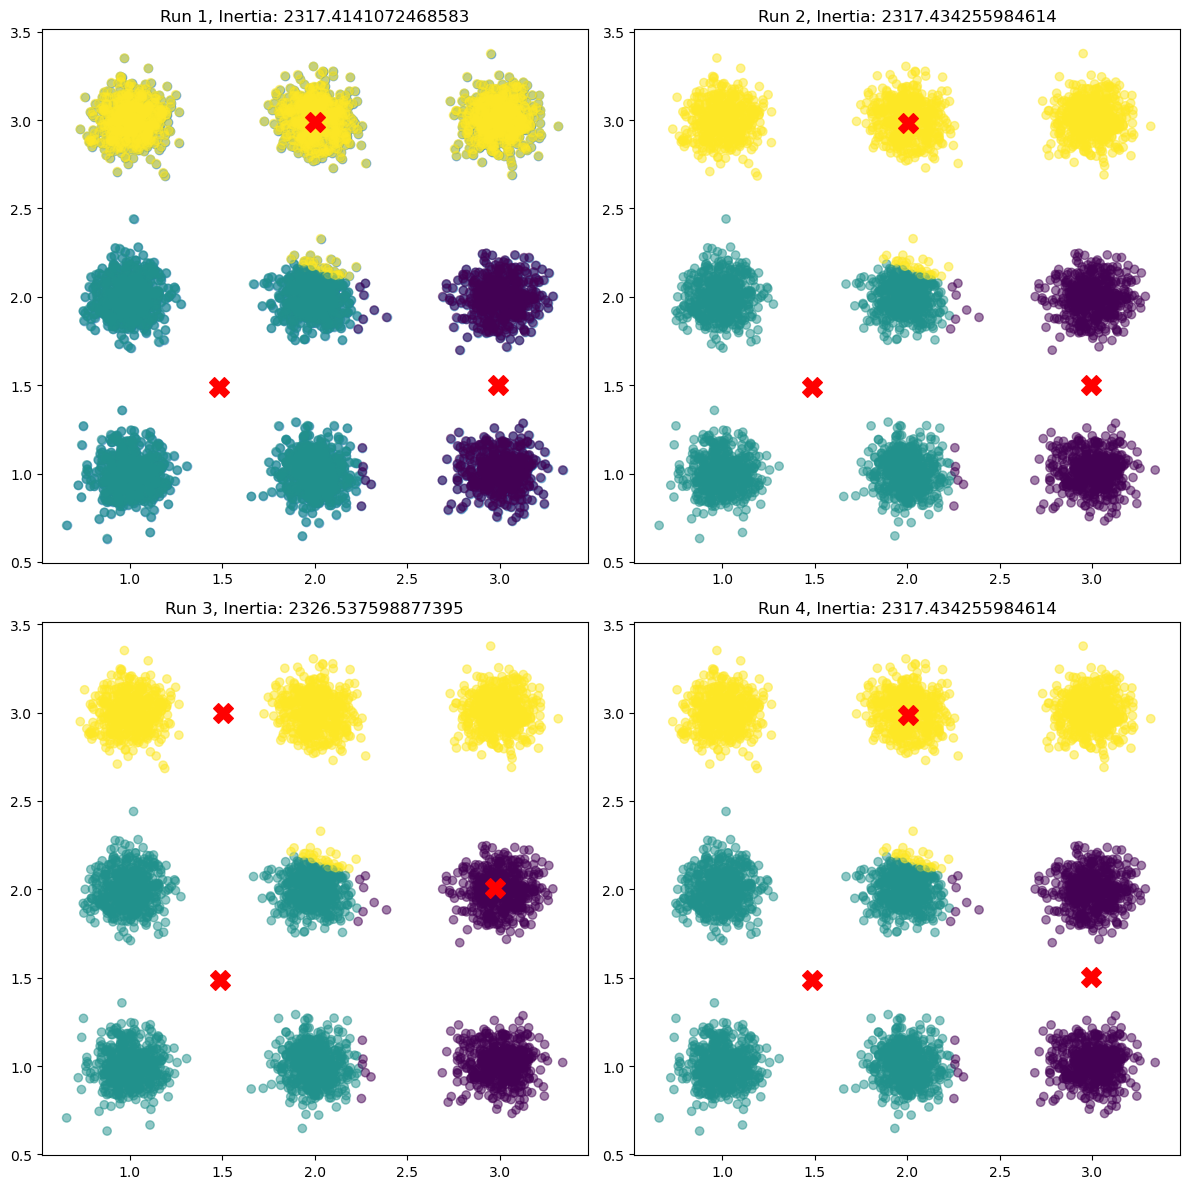

In [4]:
# 应用KMeans++算法
n_clusters = 3
inertia_list = []
cluster_centers_list = []

for i in range(4): 
    kmeans_run = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10).fit(X)
    inertia_list.append(kmeans_run.inertia_)
    cluster_centers_list.append(kmeans_run.cluster_centers_)

# 绘制聚类结果
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)

for i, centers in enumerate(cluster_centers_list, start=1):
    plt.subplot(2, 2, i)
    plt.scatter(X[:, 0], X[:, 1], c=kmeans_run.labels_, cmap='viridis', alpha=0.5)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X')
    plt.title(f'Run {i}, Inertia: {inertia_list[i-1]}')

plt.tight_layout()
plt.show()

In [5]:
# 打印并查看每次的聚类中心
print("Cluster centers from each run:", cluster_centers_list)

Cluster centers from each run: [array([[2.00375641, 2.9863729 ],
       [1.48480688, 1.49045127],
       [2.99158126, 1.50359292]]), array([[2.99158126, 1.50359292],
       [2.00368697, 2.98420297],
       [1.48379806, 1.48909222]]), array([[2.97694425, 2.00483898],
       [1.50441621, 2.99768447],
       [1.48493592, 1.48665774]]), array([[2.99158126, 1.50359292],
       [1.48379806, 1.48909222],
       [2.00368697, 2.98420297]])]


## 习题4

除了`k-means++`以外，`k-mean`算法还有一种改进，称为二分`k`均值。该算法首先将所有数据看作一类。接下来每次迭代中，找到类内部所有点距离之和  
$$S(C_k)=\frac{1}{2}\sum_{x_i,x_j \in C_k}d(x_i,x_j)$$  
最大的类，再将该类分成两个使得类内距离之和下降最多的子类。如此循环，直到类的数量达到预先指定的`K`为止。实现该算法，并在14.2节中的数据集上测试。

**解答**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

dataset = np.loadtxt('kmeans_data.csv', delimiter=',')
print('数据集大小：', len(dataset))

数据集大小： 80


In [7]:
# 欧式距离
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# 计算类内部所有点的距离之和
def intra_cluster_distance(cluster):
    distance_sum = 0
    for i in range(len(cluster)):
        for j in range(i + 1, len(cluster)):
            distance_sum += euclidean_distance(cluster[i], cluster[j])
    return distance_sum / 2

# 二分K均值算法
def binary_kmeans(data, k):
    # 将所有数据看作一类
    clusters = [data]
    # 一类的损失
    loss = 0
    for c in clusters:
        loss += intra_cluster_distance(c)
    print(f'{len(clusters)}个聚类：')
    print(f'损失函数：{loss}')

    while len(clusters) < k:
        max_distance_sum = -1
        # 找出类内部所有点距离之和最大的类
        for cluster in clusters:
            distance_sum = intra_cluster_distance(cluster)
            if distance_sum > max_distance_sum:
                max_distance_sum = distance_sum
                cluster_to_split = cluster

        # 将选定的类分成两个类
        kmeans = KMeans(n_clusters=2, random_state=0) # 这个随机种子的设置会导致报错？？
        cluster_labels = kmeans.fit_predict(cluster_to_split)

        cluster_1 = cluster_to_split[cluster_labels == 0]
        cluster_2 = cluster_to_split[cluster_labels == 1]

        clusters.remove(cluster_to_split)
        clusters.append(cluster_1)
        clusters.append(cluster_2)

        # 计算并打印损失函数
        loss = 0
        for c in clusters:
            loss += intra_cluster_distance(c)
        print(f'{len(clusters)}个聚类：')
        print(f'损失函数：{loss}')

    return clusters

In [22]:
# 关闭警告信息
import warnings
warnings.filterwarnings('ignore')
k = 4
clusters = binary_kmeans(dataset, k)
# 打印每个簇的大小和中心点
for i, cluster in enumerate(clusters):
    print(f"Cluster {i+1}: Size={len(cluster)}, Center={np.mean(cluster, axis=0)}")

1个聚类：
损失函数：58610.44102547507
2个聚类：
损失函数：15722.116557850004
3个聚类：
损失函数：7949.662486899996
4个聚类：
损失函数：1513.0432751949998
Cluster 1: Size=19, Center=[ 2.69581053 -2.81467368]
Cluster 2: Size=20, Center=[-3.38237 -2.94734]
Cluster 3: Size=20, Center=[-2.461535  2.78737 ]
Cluster 4: Size=21, Center=[2.7318381  3.01547619]


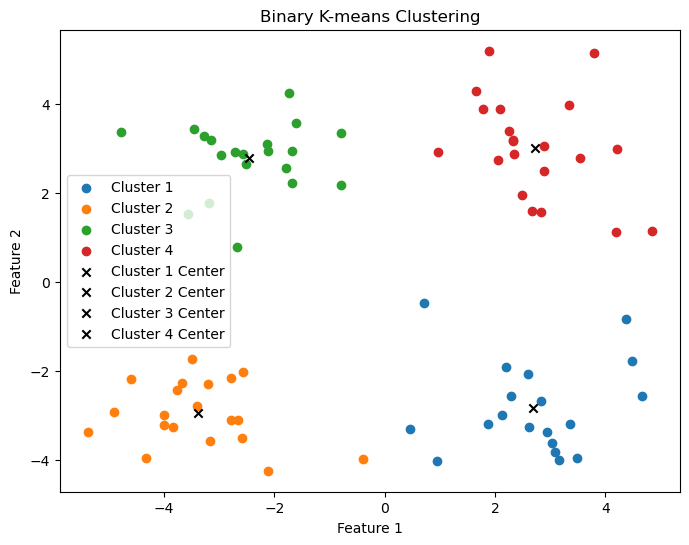

In [9]:
# 可视化
plt.figure(figsize=(8, 6))
for i, cluster in enumerate(clusters):
    plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {i + 1}')
for i, cluster in enumerate(clusters):
    cluster_center = np.mean(cluster, axis=0)
    plt.scatter(cluster_center[0], cluster_center[1], marker='x', color='black', label=f'Cluster {i+1} Center')

plt.title('Binary K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## 习题5

设计一种新的距离度量函数，实现基于该度量函数的`k-means`和`k-means++`，并在14.2节中的数据集上测试。

**解答**

In [10]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = np.loadtxt('kmeans_data.csv', delimiter=',')
# plt.figure(figsize=(3, 2))
# plt.scatter(X[:, 0], X[:, 1], s=5)
# plt.show()

In [11]:
# 中心点选择函数
# k-means
def random_init(X, k):
    idx = np.random.choice(np.arange(len(X)), size=k, replace=False)
    return X[idx]

# k-means++
def kmeanspp_init(X, k):
    idx = np.random.choice(np.arange(len(X)))
    centroids = X[idx][None]
    for k in range(1, k):
        d = []
        for data in X:
            dis = np.sum((centroids - data) ** 2, axis=1)
            d.append(np.min(dis) ** 2)
        d = np.array(d)
        d /= np.sum(d)

        cent_id = np.random.choice(np.arange(len(X)), p=d)
        cent = X[cent_id]
        centroids = np.concatenate([centroids, cent[None]], axis=0)

    return centroids

In [12]:
# 距离度量函数
# 曼哈顿
def manhattan_distance(data, centroid):
    return np.sum(np.abs(data - centroid))
# 欧几里得
def euclidean_distance(data, centroid):
    return np.sum((centroid - data) ** 2)

# 新距离度量函数(加权曼哈顿-欧式)
def wmeed(data1, data2, alpha=0.5):
    manhattan = np.sum(np.abs(data1 - data2))
    euclidean = np.sqrt(np.sum((data1 - data2) ** 2))
    return alpha * manhattan + (1 - alpha) * euclidean


In [13]:
def Kmeans(X, k, init_cent, distance_func):
    np.random.seed(0)
    # 初始化中心点，使用传入的init_cent函数和数据集X以及聚类数量k
    centroids = init_cent(X, k)
    # 初始化聚类标签数组，所有数据点初始聚类标签为0
    cluster = np.zeros(len(X), dtype=int)
    # 初始化changed标志，用于判断是否有数据点改变聚类，True表示开始迭代
    changed = True
    # 初始化迭代次数计数器
    itr = 0
    while changed:
        # 在每次迭代开始前，将changed设置为False，用于检查是否有数据点改变聚类
        changed = False
        # 初始化损失函数值
        loss = 0
        for i, data in enumerate(X):
            # 对每个数据点，计算其与所有中心点的距离，并存储在数组dis中
            dis = np.array([distance_func(data, centroid) for centroid in centroids])
            
            # 找到距离当前数据点最近的中心点的索引k
            k = np.argmin(dis)
            # 如果当前数据点的聚类标签与之前不同，则更新聚类标签，并设置changed为True
            if cluster[i] != k:
                cluster[i] = k
                changed = True
            # 计算当前数据点到其最近中心点的损失，并累加到总损失中
            loss += np.sum((data - centroids[k]) ** 2)
        # 根据上一次迭代的聚类结果，重新计算每个中心点的位置，为每个聚类的所有点的均值
        for i in range(k):
            centroids[i] = np.mean(X[cluster == i], axis=0)
        # 每次迭代后，增加迭代计数器
        itr += 1

    # 打印出使用的度量函数名称、迭代次数和最终的损失值
    print(f'使用初始化方法 {init_cent.__name__} 和 {distance_func.__name__} 距离度量，'
        f'迭代次数：{itr}, Loss {loss:.4f}')

    # 返回最终的中心点和每个数据点的聚类标签
    return centroids, cluster

使用初始化方法 random_init 和 euclidean_distance 距离度量，迭代次数：6, Loss 234.7375
使用初始化方法 random_init 和 manhattan_distance 距离度量，迭代次数：6, Loss 234.7375
使用初始化方法 random_init 和 wmeed 距离度量，迭代次数：6, Loss 234.7375
使用初始化方法 kmeanspp_init 和 euclidean_distance 距离度量，迭代次数：2, Loss 187.1972
使用初始化方法 kmeanspp_init 和 manhattan_distance 距离度量，迭代次数：2, Loss 193.5368
使用初始化方法 kmeanspp_init 和 wmeed 距离度量，迭代次数：2, Loss 187.1972


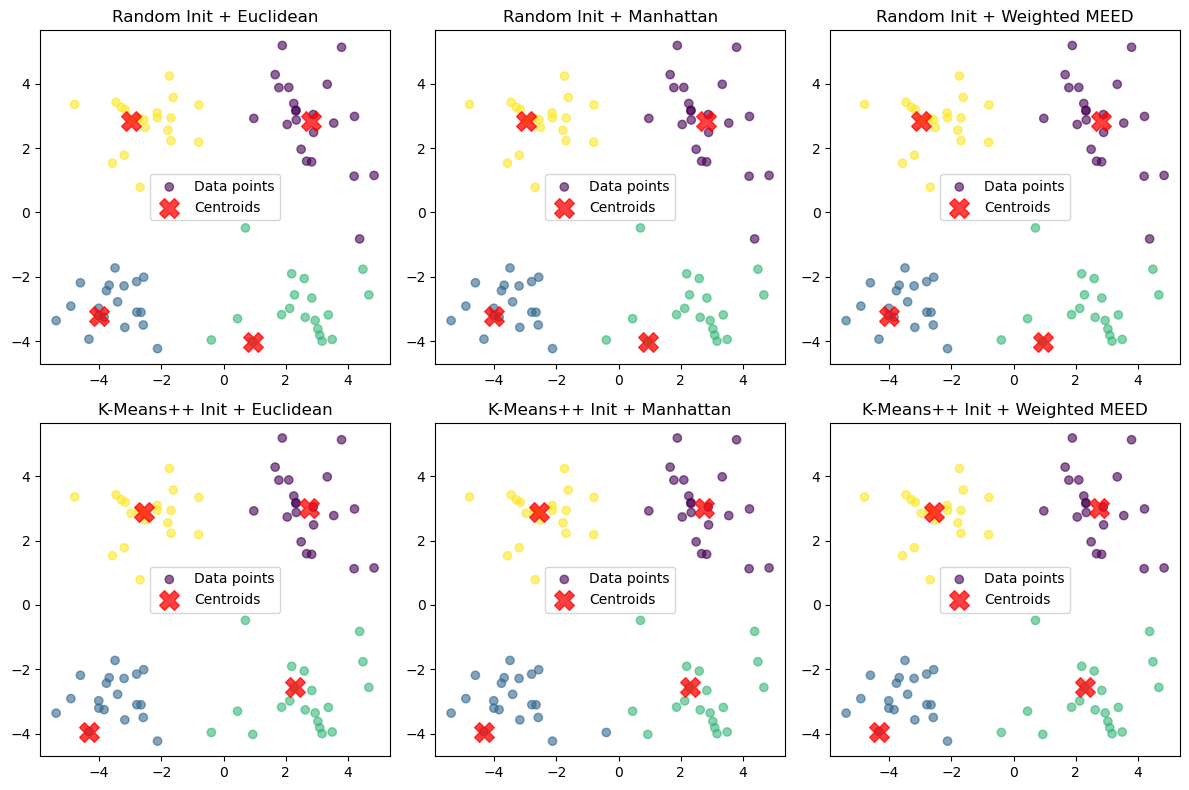

In [14]:
import matplotlib.pyplot as plt

# 存储每次运行的中心点和聚类标签
all_centroids = []
all_clusters = []
all_methods = []

# 为每种方法运行K-Means算法
methods = [
    (random_init, euclidean_distance, 'Random Init + Euclidean'),
    (random_init, manhattan_distance, 'Random Init + Manhattan'),
    (random_init, wmeed, 'Random Init + Weighted MEED'),
    (kmeanspp_init, euclidean_distance, 'K-Means++ Init + Euclidean'),
    (kmeanspp_init, manhattan_distance, 'K-Means++ Init + Manhattan'),
    (kmeanspp_init, wmeed, 'K-Means++ Init + Weighted MEED')
]

for init_func, dist_func, method_name in methods:
    cent, cluster = Kmeans(X, 4, init_func, dist_func)
    all_centroids.append(cent)
    all_clusters.append(cluster)
    all_methods.append(method_name)

# 为每种方法绘制结果
plt.figure(figsize=(12, 8))

for i, (cents, clusters, method_name) in enumerate(zip(all_centroids, all_clusters, all_methods), start=1):
    plt.subplot(2, 3, i)
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', label='Data points', alpha=0.6)
    plt.scatter(cents[:, 0], cents[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
    plt.title(method_name)
    plt.legend()

plt.tight_layout()
plt.show()

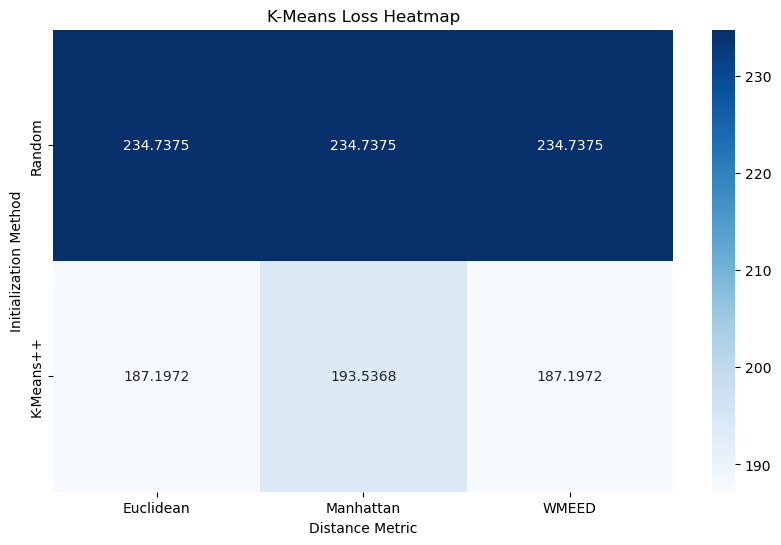

In [15]:
import seaborn as sns

# 创建一个损失值矩阵，行代表初始化方法，列代表距离度量
methods = ['Random', 'K-Means++']
distances = ['Euclidean', 'Manhattan', 'WMEED']
loss_matrix = np.array([
    [234.7375, 234.7375, 234.7375],
    [187.1972, 193.5368, 187.1972]
])

plt.figure(figsize=(10, 6))
sns.heatmap(loss_matrix, annot=True, fmt='.4f', xticklabels=distances, yticklabels=methods, cmap='Blues')
plt.title('K-Means Loss Heatmap')
plt.xlabel('Distance Metric')
plt.ylabel('Initialization Method')
plt.show()

## 习题6

查阅相关文献，学习并实现`DBSCAN`聚类算法，并和`k-means`、`k-means++`对比。

&emsp;&emsp;参考论文 DBSCAN论文：Ester M, Kriegel H P, Sander J, et al. A density-based algorithm for discovering clusters in large spatial databases with noise[C]//kdd. 1996, 96(34): 226-231.

**解答**

https://geneblue.github.io/2022/01/17/ml/02-clustering-algo-dbscan/  

实现DBSCAN选哟两个基本参数$(\epsilon, minPts)$，其中$\epsilon$为核心点到可达点的半径，minPts是该半径内要满足样本点的数量。这样的点才能被识别为同一类。

基本步骤：
- **计算距离**：计算两点距离
- **核心点**：判断一个点是否为核心点， 满足给定$\epsilon$范围内至少有minPts个邻居
- **密度可达**：一个点在给定$\epsilon$范围内有核心点
- **密度连接**：两个点之间密度可达
- **聚类**：密度可达的点划分为一个类
- **处理噪声**：未被划分的点为噪声


In [16]:
import numpy as np
import matplotlib.pyplot as plt

def DBSCAN(X, eps, minPts):
    """
    eps：领域半径
    minPts：核心点最小数目
    """
    n_samples = X.shape[0]
    labels = np.zeros(n_samples, dtype=int)
    # 标记噪声点，-1表示未访问到的点，-2表示噪声点
    labels.fill(-1)

    for i in range(n_samples):
        if labels[i] != -1:
            continue

        # 找出第i个点的ε邻域内的所有点
        neighbors = np.linalg.norm(X[i].reshape(1, -1) - X, axis=1) <= eps
        n_neighbors = np.sum(neighbors)

        if n_neighbors < minPts:
            # 如果领域内的点数少于minPts，则该点是噪声点
            labels[i] = -2
        else:
            # 该点是核心点，开始一个新的聚类
            cluster_label = np.max(labels) + 1
            labels[i] = cluster_label
            # 使用队列实现BFS
            queue = np.where(neighbors)[0].tolist()
            while queue:
                neighbor = queue.pop(0)
                if labels[neighbor] == -1:
                    labels[neighbor] = cluster_label
                    # 更新领域内的点
                    neighbor_neighbors = np.linalg.norm(X[neighbor].reshape(1, -1) - X, axis=1) <= eps
                    n_neighbor_neighbors = np.sum(neighbor_neighbors)
                    if n_neighbor_neighbors >= minPts:
                        queue.extend(np.where(neighbor_neighbors)[0].tolist())
            print(f"Found core sample {i} of cluster {cluster_label}")
        
    return labels    

In [17]:
# 生成月牙形数据集
def generate_moon_dataset(n_samples=300):
    # 设置随机种子以确保结果的可重复性
    np.random.seed(256)

    # 生成月牙形数据集的第一部分
    x1 = np.linspace(-3, 3, 300, dtype=np.float32)[:, np.newaxis]
    noise = np.random.normal(0, 0.15, x1.shape).astype(np.float32)
    y1 = -np.square(x1) / 3 + 4.5 + noise

    # 生成月牙形数据集的第二部分
    x2 = np.linspace(0, 6, 300, dtype=np.float32)[:, np.newaxis]
    y2 = np.square(x2 - 3) / 3 + 0.5 + noise

    # 合并两部分数据
    X = np.concatenate((np.hstack((x1, y1)), np.hstack((x2, y2))), axis=0)

    return X

In [18]:
# X = np.loadtxt('kmeans_data.csv', delimiter=',')
X = generate_moon_dataset()

In [19]:
# 参数
eps = 0.5
minPts = 5

# 执行聚类
labels = DBSCAN(X, eps, minPts)

# 打印聚类结果
print("Cluster labels:", labels)

Found core sample 0 of cluster 0
Found core sample 300 of cluster 1
Cluster labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1

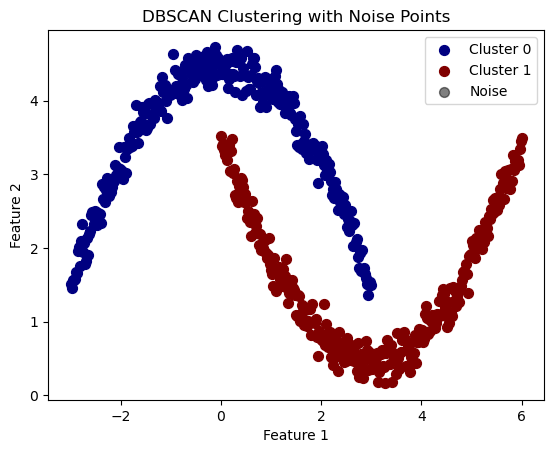

In [23]:
import matplotlib.pyplot as plt
# 关闭警告信息
import warnings
warnings.filterwarnings('ignore')

# 找出所有聚类的颜色
n_clusters = np.max(labels) + 1  # 聚类数量等于最大标签值加1
colors = plt.cm.jet(np.linspace(0, 1, n_clusters))

# 绘制每个聚类的点
for cluster in range(n_clusters):
    cluster_points = X[labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, c=colors[cluster], label=f'Cluster {cluster}')

# 绘制噪声点
noise_points = X[labels == -2]  
plt.scatter(noise_points[:, 0], noise_points[:, 1], s=50, c='k', label='Noise', alpha=0.5)  # 使用黑色和半透明表示噪声点

# 添加图例
plt.legend()

# 添加标题和坐标轴标签
plt.title('DBSCAN Clustering with Noise Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# 显示图表
plt.show()

Found core sample 0 of cluster 0
Found core sample 300 of cluster 1


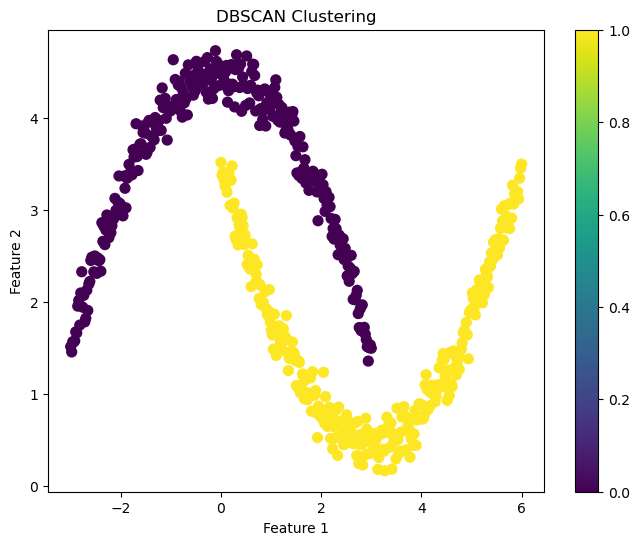

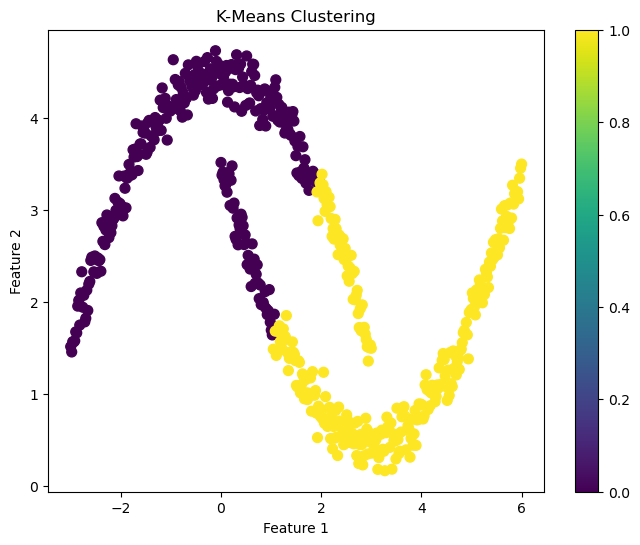

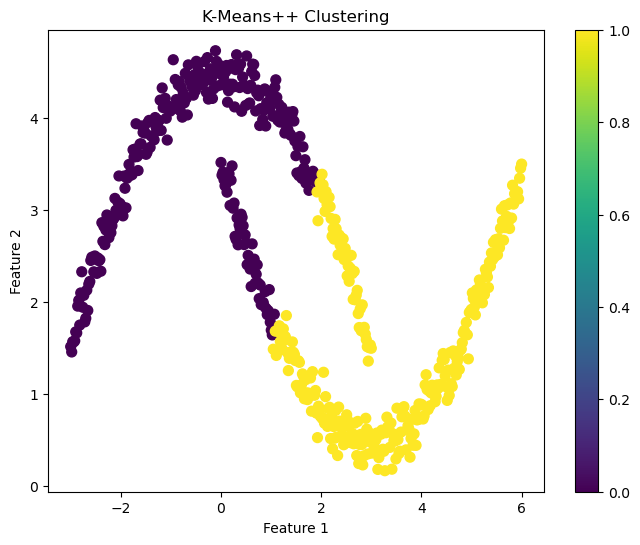

In [24]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import _kmeans
# 关闭警告信息
import warnings
warnings.filterwarnings('ignore')

# 使用您的DBSCAN实现
labels_dbscan = DBSCAN(X, eps, minPts)

# 使用scikit-learn的K-Means实现
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
labels_kmeans = kmeans.fit_predict(X)

# 使用scikit-learn的K-Means++实现
kmeanspp = KMeans(n_clusters=2, init='k-means++', random_state=42)
labels_kmeanspp = kmeanspp.fit_predict(X)

# 可视化结果
def visualize_clustering(X, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()
    plt.show()

# 可视化DBSCAN聚类结果
# print("DBSCAN Cluster labels:", labels_dbscan)
visualize_clustering(X, labels_dbscan, title='DBSCAN Clustering')

# 可视化K-Means聚类结果
# print("K-Means Cluster labels:", labels_kmeans)
visualize_clustering(X, labels_kmeans, title='K-Means Clustering')

# 可视化K-Means++聚类结果
# print("K-Means++ Cluster labels:", labels_kmeanspp)
visualize_clustering(X, labels_kmeanspp, title='K-Means++ Clustering')

总结对比DBSCAN、K-Means和K-Means++
1. **无监督学习**：它们都是无监督学习算法，意味着它们在训练过程中不需要标签数据。
2. **分组数据**：目标是将数据集中的样本根据某种相似性度量分成多个组（簇）。

区别：  
**DBSCAN**：
- **基于密度**：DBSCAN通过识别数据空间中的密度异常来找到聚类，能够识别任意形状的聚类，并对噪声点具有良好的鲁棒性。
- **参数**：需要指定邻域半径`eps`和最小点数`minPts`。
- **噪声处理**：可以将不属于任何聚类的点标记为噪声。
- **适用场景**：适合于发现任意形状的聚类，特别是当数据集中包含噪声和离群点时。

**K-Means**：
- **基于中心**：通过迭代地移动簇中心点（质心）来最小化簇内误差的平方和。
- **参数**：需要预先指定簇的数量`k`。
- **初始化敏感**：对初始质心的选择敏感，可能导致局部最优解。
- **适用场景**：适用于数据集的簇大致呈球形分布，且簇的数量已知时。

**K-Means++**：
- **优化初始化**：K-Means++是K-Means的一个变体，它使用一种启发式方法来选择初始质心，以减少陷入局部最优解的风险。
- **参数**：同样需要预先指定簇的数量`k`。
- **适用场景**：与K-Means类似，但因为其智能初始化，通常能获得更好的聚类结果。

适用数据场景：  
- **DBSCAN**：适用于那些聚类形状不规则、包含噪声和离群点的数据集。它在空间数据集中表现出色，如地理空间聚类或处理具有空间一致性的数据。
- **K-Means**：适用于那些聚类形状大致为球形且大小相似的数据集。它在确定簇的数量时需要预先知道`k`的值，且对初始质心敏感，可能需要多次运行以获得最佳结果。
- **K-Means++**：适用于需要K-Means聚类但希望减少对初始质心选择敏感性的情况。它通常提供比标准K-Means更好的聚类结果，尤其是在数据集较大或聚类较复杂时。